<h1>Lab 02</h1>
<h4>Name : Ambalia Harshit</h4>
<h4>Roll No. : --</h4>

<h3>AIM : Understaing of various Data-Preprocessing techniques</h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv('/content/Exercise-CarData.csv')
header_values = df.columns
# print(header_values)
# print(df.describe())
output_filename = "Un-Processed-data.csv"
df.to_csv(output_filename, index=False)

<h2>Handling Missing data</h2>

In [3]:
# Some data are limited from the list
def handle_missing_data_using_random(df, column_name):
    # for ['FuelType', 'MetColor', 'Automatic']
    df[column_name] = df[column_name].replace(to_replace='.*\?.*', value=np.nan, regex=True)

    missing_indices = df[df[column_name].isnull()].index
    non_missing_indices = df[df[column_name].notnull()].index

    if len(missing_indices) < len(non_missing_indices):
        for missing_index in missing_indices:
            random_non_missing_index = np.random.choice(non_missing_indices)
            random_value = df.loc[random_non_missing_index, column_name]
            df.loc[missing_index, column_name] = random_value
    else:
        print('Dropping the column')
        df = df.drop(columns=[column_name])

    return df

In [4]:
# Some data can not be listed.
def handle_missing_column_using_average(df, column_name):
    # for ['Price', 'HP', 'Age', 'KM', 'CC', 'Weight']
    df[column_name] = df[column_name].replace(to_replace='.*\?.*', value=np.nan, regex=True)

    missing_indices = df[df[column_name].isnull()].index
    non_missing_indices = df[df[column_name].notnull()].index

    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df[column_name] = df[column_name].astype(float)

    if len(missing_indices) < len(non_missing_indices):
        column_mean = df.loc[non_missing_indices, column_name].mean()
        df[column_name] = df[column_name].fillna(column_mean)
    else:
        print('Dropping the column')
        df = df.drop(columns=[column_name])

    return df

In [5]:
handle_missing_from = ['FuelType', 'MetColor', 'Automatic', 'Doors']
for column_name in handle_missing_from:
    # if df[column_name].isnull().sum() < df[column_name].notnull().sum():
    df = handle_missing_data_using_random(df, column_name)
    # print(df[column_name])
# print(df.describe())

In [6]:
handle_missing_from = ['Price', 'HP', 'Age', 'KM', 'CC', 'Weight']
for column_name in handle_missing_from:
    # if df[column_name].isnull().sum() < df[column_name].notnull().sum():
    df = handle_missing_column_using_average(df, column_name)
    # print(df[column_name])
# print(df.describe())

<h1>Handling Mis-match datatype Data</h1>

In [7]:
def map_strings_to_numeric(df, column_name, mapping):
    if df[column_name].isnull().sum() < df[column_name].notnull().sum():
        df[column_name] = df[column_name].replace(mapping)
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    else:
        df = df.drop(columns=[column_name])
    return df

In [8]:
mapping = { 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10 }
column_name = 'Doors'
df = map_strings_to_numeric(df, column_name, mapping)

<h1>Label encoding</h1>

In [9]:
# from sklearn.preprocessing import LabelEncoder
def perform_encoding(df, column_name):
    # label_encoder = LabelEncoder()
    # df[column_name] = label_encoder.fit_transform(df[column_name])
    dummy = pd.get_dummies(df[column_name])
    df = df.drop([column_name],axis=1)
    df = pd.concat([df.iloc[:, :1], dummy, df.iloc[:, 1:]], axis=1)
    return df

In [10]:
column_name = "FuelType"
df = perform_encoding(df, column_name)
print(df)

      Unnamed: 0  CNG  Diesel  Petrol    Price        Age            KM  \
0              0    0       1       0  13500.0  23.000000  46986.000000   
1              1    0       1       0  13750.0  23.000000  72937.000000   
2              2    0       1       0  13950.0  24.000000  41711.000000   
3              3    0       1       0  14950.0  26.000000  48000.000000   
4              4    0       1       0  13750.0  30.000000  38500.000000   
...          ...  ...     ...     ...      ...        ...           ...   
1431        1431    0       0       1   7500.0  55.672156  20544.000000   
1432        1432    0       0       1  10845.0  72.000000  68647.239972   
1433        1433    0       0       1   8500.0  55.672156  17016.000000   
1434        1434    0       0       1   7250.0  70.000000  68647.239972   
1435        1435    0       0       1   6950.0  76.000000      1.000000   

         HP  MetColor  Automatic      CC  Doors  Weight  
0      90.0       1.0          0  2000.0 

<h2>Dropping the highly co-related columns</h2>

In [11]:
corr = df.corr()
corr.head()

,Unnamed: 0,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Unnamed: 0,1.000000,-0.048573,-0.128277,0.138634,-0.738289,0.872938,0.276041,-0.108220,-0.057109,0.066299,-0.184490,-0.130268,-0.414577
CNG,-0.048573,1.000000,-0.037323,-0.285872,-0.028423,-0.001511,0.134170,0.055546,0.016150,-0.025783,0.011656,0.024139,0.048493
Diesel,-0.128277,-0.037323,1.000000,-0.946931,0.016901,-0.067851,0.381123,-0.494730,-0.025154,-0.075701,0.708898,0.006353,0.499582
Petrol,0.138634,-0.285872,-0.946931,1.000000,-0.007064,0.065551,-0.408630,0.456547,0.018926,0.080886,-0.683537,-0.013857,-0.494665
Price,-0.738289,-0.028423,0.016901,-0.007064,1.000000,-0.845111,-0.565016,0.308414,0.087570,0.033081,0.165067,0.185326,0.581198


In [12]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
df = df.drop(to_drop, axis=1)
print(df)

      Unnamed: 0  CNG  Diesel  Petrol    Price        Age            KM  \
0              0    0       1       0  13500.0  23.000000  46986.000000   
1              1    0       1       0  13750.0  23.000000  72937.000000   
2              2    0       1       0  13950.0  24.000000  41711.000000   
3              3    0       1       0  14950.0  26.000000  48000.000000   
4              4    0       1       0  13750.0  30.000000  38500.000000   
...          ...  ...     ...     ...      ...        ...           ...   
1431        1431    0       0       1   7500.0  55.672156  20544.000000   
1432        1432    0       0       1  10845.0  72.000000  68647.239972   
1433        1433    0       0       1   8500.0  55.672156  17016.000000   
1434        1434    0       0       1   7250.0  70.000000  68647.239972   
1435        1435    0       0       1   6950.0  76.000000      1.000000   

         HP  MetColor  Automatic      CC  Doors  Weight  
0      90.0       1.0          0  2000.0 

In [13]:
output_filename = "Processed-Data.csv"
df.to_csv(output_filename, index=False)

<h2>Performing MinMaxNormalization </h2>

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [15]:
# As we're dropping the column, If that column would be in there dataframe or not.
scaler = MinMaxScaler()
rows = ['Price', 'Age', 'KM', 'CC', 'Weight', 'HP']
header_values = df.columns
print(header_values)
for column in rows:
    if column in header_values:
        scaler.fit(df[rows])
        df[rows] = scaler.transform(df[rows])

Index(['Unnamed: 0', 'CNG', 'Diesel', 'Petrol', 'Price', 'Age', 'KM', 'HP',
       'MetColor', 'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')


In [16]:
output_filename = "Normalized-Data.csv"
df.to_csv(output_filename, index=False)
#Here's our normalized Data
print(df)

      Unnamed: 0  CNG  Diesel  Petrol     Price       Age        KM        HP  \
0              0    0       1       0  0.325044  0.278481  0.193355  0.170732   
1              1    0       1       0  0.333925  0.278481  0.300149  0.170732   
2              2    0       1       0  0.341030  0.291139  0.171647  0.170732   
3              3    0       1       0  0.376554  0.316456  0.197528  0.170732   
4              4    0       1       0  0.333925  0.367089  0.158433  0.170732   
...          ...  ...     ...     ...       ...       ...       ...       ...   
1431        1431    0       0       1  0.111901  0.692053  0.084539  0.138211   
1432        1432    0       0       1  0.230728  0.898734  0.282496  0.138211   
1433        1433    0       0       1  0.147425  0.692053  0.070021  0.138211   
1434        1434    0       0       1  0.103020  0.873418  0.282496  0.138211   
1435        1435    0       0       1  0.092362  0.949367  0.000000  0.333333   

      MetColor  Automatic  

<h1>Coparing the data : Previous Vs Then</h1>

```
Here we are using Processed data which is not normalized.
As Normalized data have precision in 0.0001 and which will be really difficult to plot in.
```

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(column_name):

    df_unprocessed = pd.read_csv('/content/Un-Processed-data.csv')
    df_processed = pd.read_csv('/content/Processed-Data.csv')

    # Create the subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histograms of the age column
    sns.histplot(df_unprocessed[column_name], ax=axs[0], label='Unprocessed')
    sns.histplot(df_processed[column_name], ax=axs[1], label='Processed')

    # Customize the plots
    plt.suptitle('Distribution of {} in Unprocessed and Processed Datasets'.format(column_name))
    axs[0].set_xlabel('{}'.format(column_name))
    axs[0].set_ylabel('Number of People')
    axs[1].set_xlabel('{}'.format(column_name))
    axs[1].set_ylabel('Number of People')
    plt.legend()

    # Return the plot
    return fig

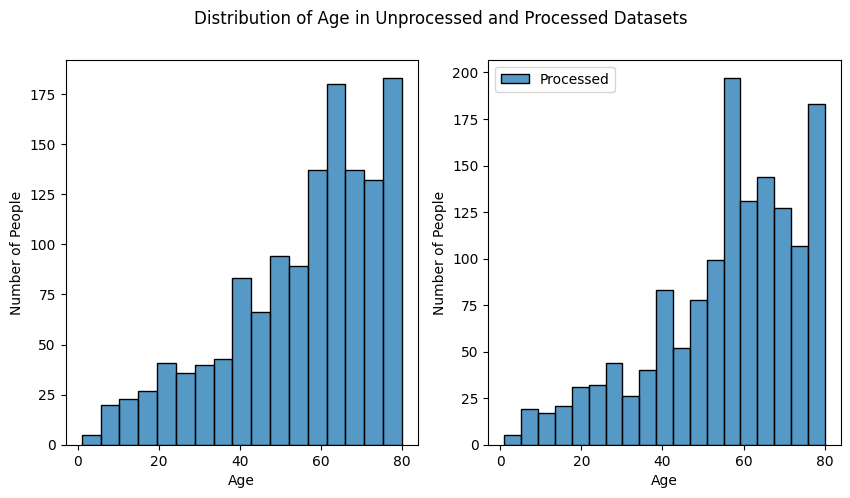

In [18]:
column_name = 'Age'
fig = plot_histograms(column_name)
plt.show()

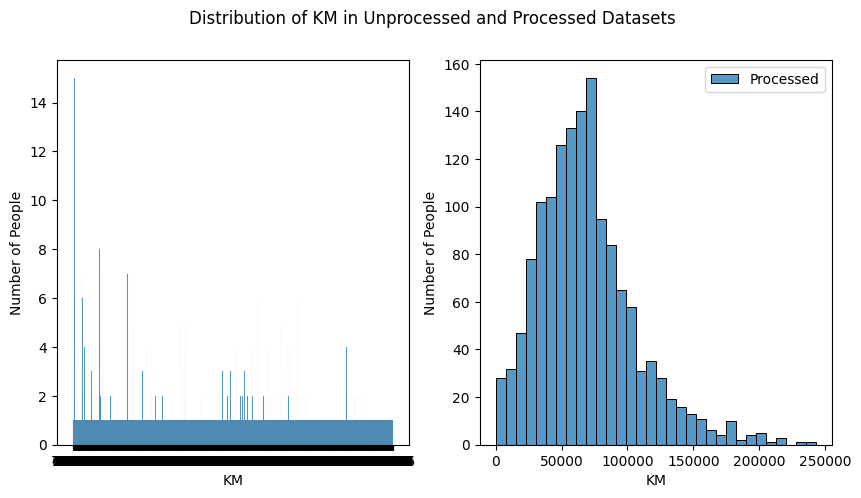

In [19]:
column_name = 'KM'
fig = plot_histograms(column_name)
plt.show()

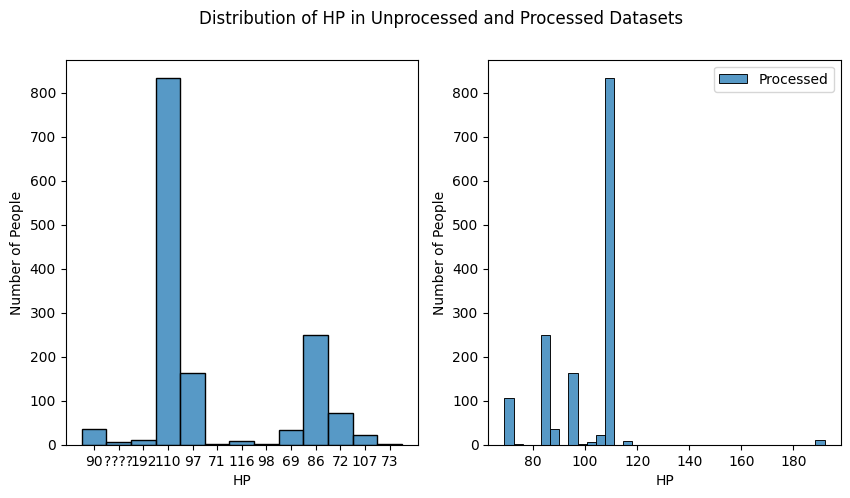

In [20]:
column_name = 'HP'
fig = plot_histograms(column_name)
plt.show()

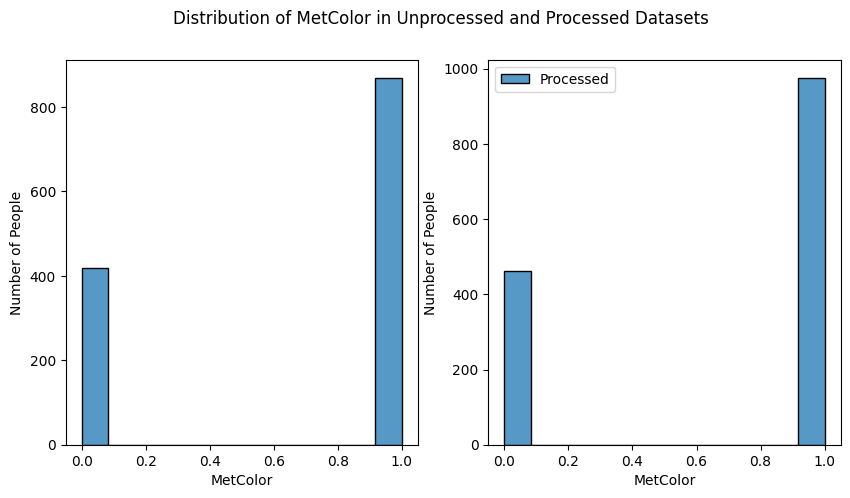

In [21]:
column_name = 'MetColor'
fig = plot_histograms(column_name)
plt.show()

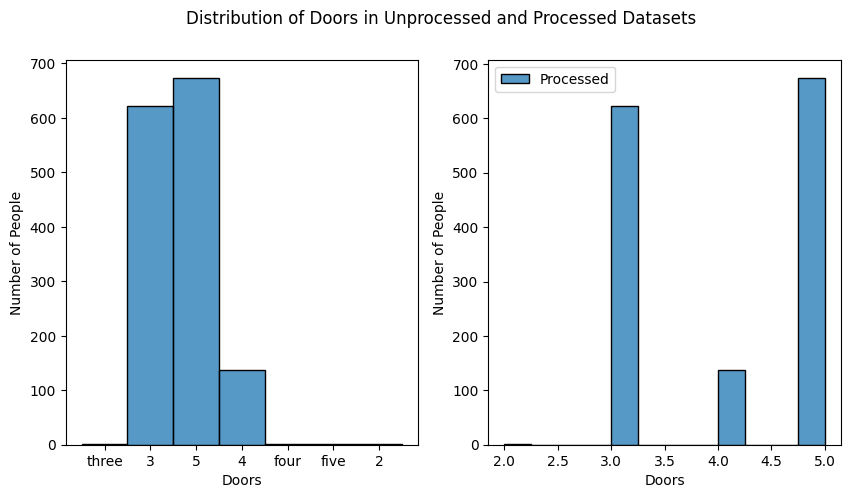

In [22]:
column_name = 'Doors'
fig = plot_histograms(column_name)
plt.show()

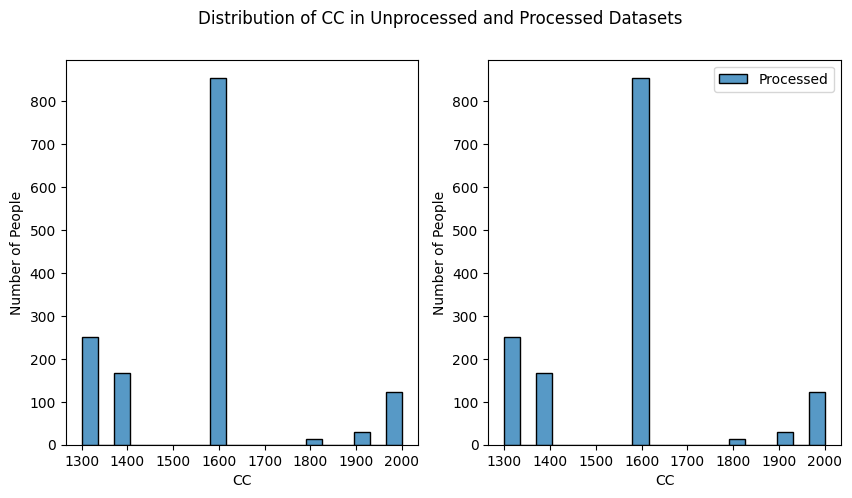

In [23]:
column_name = 'CC'
fig = plot_histograms(column_name)
plt.show()